In [68]:
#insert all packages needed
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#import the smiles list
file_name = r"C:\Users\20203699\Downloads\tested_molecules-1.csv"
with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles))

# of SMILES: 1001


In [70]:
#split the csv file into multiple columns
#read the dataframe
df_molecules = pd.read_csv(file_name)

#split the dataframe
#new_columns = df['SMILES;ALDH1-inhibitor'].str.split(';', expand=True)
#df_molecules = pd.concat([df, new_columns], axis=1)

#drop the original column
#df_molecules = df_molecules.drop('SMILES;ALDH1-inhibitor', axis=1)

#rename the column names 
#df_molecules = df_molecules.rename(columns={0:'SMILES',1:'ALDH1-inhibitor'})


df_molecules

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [71]:
#since the list is very large, to try stuff out, we look at the first 4 smiles
only_smiles_list = df_molecules['SMILES']

smiles_tryout = only_smiles_list
smiles_tryout

0      COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...
1                 O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1
2      Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...
3                      CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1
4      CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21
                             ...                        
995               COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1
996                         CCNc1oc(COc2cccc(C)c2)nc1C#N
997                            NC(=O)Cn1cnc(-c2ccccc2)c1
998    Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...
999            O=C(Cn1nnc2c(cnn2-c2ccccc2)c1=O)NCc1cccs1
Name: SMILES, Length: 1000, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:263: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


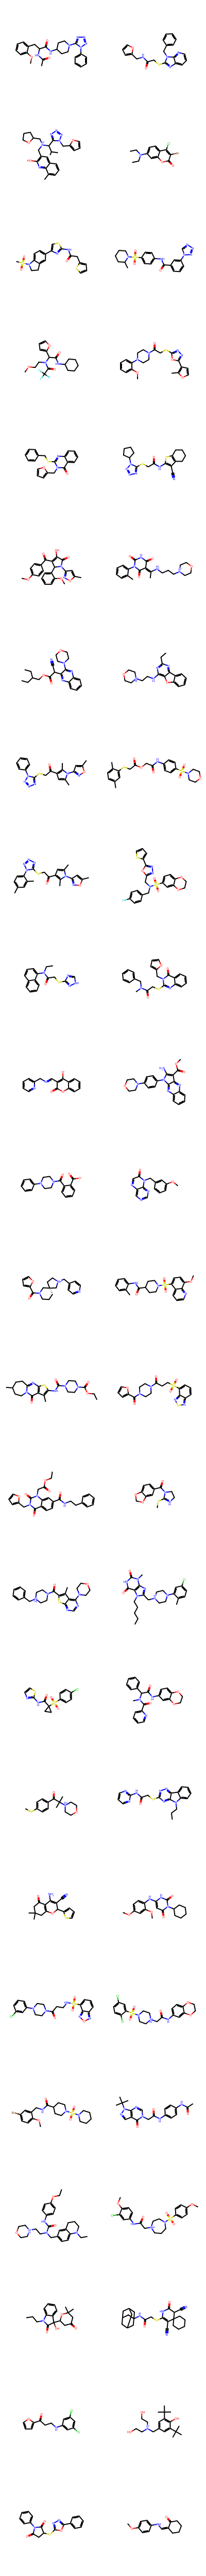

In [72]:
#draw the four mole images
mols = [Chem.MolFromSmiles(smi) for smi in smiles_tryout]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [73]:
#calculate descriptor list
desc_list = [n[0] for n in Descriptors._descList]
print(len(desc_list))
print(desc_list)

209
['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'Slog

In [74]:
#calculate molecular descriptors
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)

rdkit_desc = [calc.CalcDescriptors(m) for m in mols]

#print(len(rdkit_desc[0]))
print(rdkit_desc[0])
rdkit_desc[0][0]

(13.083531447323905, 13.083531447323905, 0.001173180692030762, -0.6831399723499987, 0.5203647862499531, 463.54200000000026, 434.3100000000002, 463.2331877880001, 178, 0, 0.2498683330982345, -0.4964765338733181, 0.4964765338733181, 0.2498683330982345, 1.088235294117647, 1.7941176470588236, 2.5, 16.465857064612035, 10.012387123815586, 2.277377408380586, -2.329164203915786, 2.2133733533282376, -2.5243684910679804, 5.869761700770313, -0.12818123363075157, 3.3456496356368177, 1.3746473471677294, 1110.519071976258, 23.915638315627202, 19.34719971591, 19.34719971591, 16.546045193307766, 11.32986098667514, 11.32986098667514, 8.265228811036, 8.265228811036, 5.888539678818338, 5.888539678818338, 4.187622471031995, 4.187622471031995, -3.95, 69581108.14936109, 23.21634357240783, 10.778357860560856, 5.506758970272485, 197.8337076591357, 20.270349892663187, 11.791352662431866, 0.0, 17.762698739689505, 0.0, 0.0, 9.589074368143644, 0.0, 4.681802935145185, 0.0, 41.4968842190707, 47.030966134243585, 32.

13.083531447323905

In [75]:
print(rdkit_desc[1])
rdkit_desc[1][2]

(12.170096721960899, 12.170096721960899, 0.06696628033929608, -0.06696628033929608, 0.49856378170411836, 378.4570000000001, 360.31300000000016, 378.11504681599996, 136, 0, 0.23035268756871552, -0.4674764848605472, 0.4674764848605472, 0.23035268756871552, 1.1111111111111112, 2.0, 2.814814814814815, 32.166555701346056, 10.202244703301824, 2.140429257626834, -2.0838393989254835, 2.2353852988713228, -2.240774123297089, 7.9936616968026515, -0.1183156885934503, 3.3388162513572706, 1.485089967892608, 1028.7750238614922, 18.476480726871785, 14.538558962536994, 15.35505554346472, 13.29282633568371, 8.56479124261903, 9.550389802272521, 5.957024154037291, 6.899522794897028, 4.024512671429914, 5.0009114566782795, 2.7364034392579413, 3.5684121153563533, -3.0599999999999996, 3137659.249845498, 17.358643756727396, 8.092316828618324, 4.1997055116487525, 160.17427596354318, 9.733939541059678, 11.276948136490704, 10.803613702588436, 5.907179729351506, 0.0, 0.0, 9.361636831863176, 9.967957041894417, 0.0,

0.06696628033929608

In [76]:
#add columns to dataframe
for col in range(len(desc_list)):
    column = []
    for row in range(len(rdkit_desc)):
        #the row iteration is for the molecule and the col iteration for the descriptor, this makes a list which will be
        #added to the dataframe
        descriptor = rdkit_desc[row][col]
        column.append(descriptor)
    df_molecules[desc_list[col]] = column
df_molecules

,SMILES,ALDH1_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,...,0,0,0,0,1,0,0,0,0,0
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,...,1,0,0,0,0,0,0,0,0,0
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,...,0,0,0,0,1,0,0,0,0,0
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,...,0,0,0,0,0,0,0,0,0,0
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0,12.276695,12.276695,0.095308,-0.234165,0.779148,261.301,244.165,261.123369,...,0,0,0,0,0,0,0,0,0,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0,8.926724,8.926724,0.197944,0.197944,0.891297,257.293,242.173,257.116427,...,0,0,0,0,0,0,0,0,0,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0,10.688087,10.688087,0.166502,-0.368508,0.805927,201.229,190.141,201.090212,...,0,0,0,0,0,0,0,0,0,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0,12.603109,12.603109,0.065686,-0.447592,0.644831,392.441,372.281,392.126674,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='ALDH1_inhibition', ylabel='MaxAbsEStateIndex'>

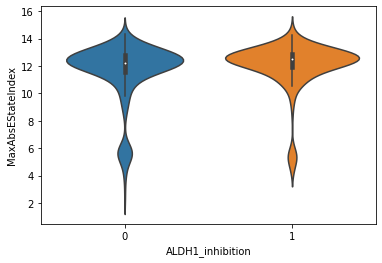

In [77]:
sns.violinplot(x='ALDH1_inhibition', y='MaxAbsEStateIndex', data=df_molecules)
